In [52]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/heart.csv')

In [53]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [54]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [55]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [56]:
x = data.drop(['target'],axis=1)
y = data['target'].values.reshape(-1,1)

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717, 1)
(308, 1)


In [58]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [59]:
xtest = [[50,0,0,110,254,0,0,159,0,0.1,2,0,2]]
pred = model.predict(xtest)

print("Person has heart disease" if pred else "Person does not have heart disease")

Person has heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
y_pred = model.predict(x_test)

from sklearn import metrics

metrics.confusion_matrix(y_test,y_pred)

array([[135,  24],
       [ 43, 106]])

In [61]:
metrics.precision_score(y_test,y_pred)

0.8153846153846154

In [62]:
metrics.recall_score(y_test,y_pred)

0.7114093959731543

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


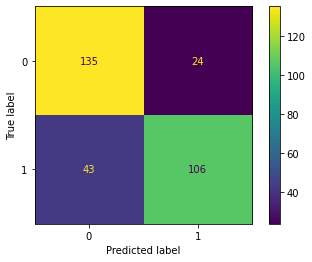

In [63]:
metrics.plot_confusion_matrix(model,x_test,y_test)

In [64]:
metrics.f1_score(y_test,y_pred)

0.7598566308243728

In [65]:
metrics.matthews_corrcoef(y_test,y_pred)

0.5670995342889267

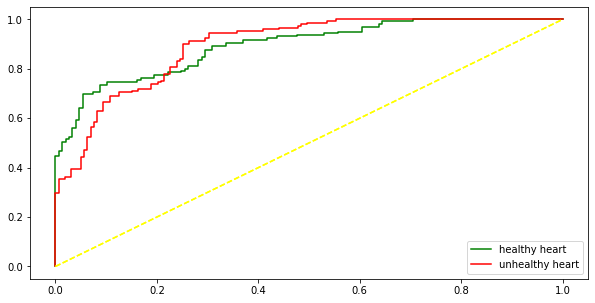

In [66]:
fpr={}
tpr={}
thresh={}
y_proba=model.predict_proba(x_test)
for i in range(2):
    fpr[i],tpr[i],thresh[i]= metrics.roc_curve(y_test,y_proba[:,i],pos_label=i)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fpr[0],tpr[0],linestyle='-',color='green',label='healthy heart')
plt.plot(fpr[1],tpr[1],linestyle='-',color='red',label='unhealthy heart')
plt.plot([[0,0],[1,1]],linestyle='--',color='yellow')
plt.legend(loc='lower right')
plt.show()

In [69]:
TN, FN, FP, TP = metrics.confusion_matrix(list(y_test), list(y_pred), labels=[0,1]).ravel()

print("\n For Test Data")
print("\nTN",TN)
print("\nTP",TP)
print("\nFN",FN)
print("\nFP",FP)


 For Test Data

TN 135

TP 106

FN 24

FP 43


In [71]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       159
           1       0.82      0.71      0.76       149

    accuracy                           0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



In [73]:
Sensitivity = TP/(TP+FN)

print("Sensitivity :", Sensitivity)

Sensitivity : 0.8153846153846154


In [74]:
Specificity = TP/(TP+FP)

print("Specificity :", Specificity)

Specificity : 0.7114093959731543
